<a href="https://colab.research.google.com/github/mudheerakariyawasam/BIS-Assignment1-P2/blob/main/Analysis-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [132]:
from google.colab import files

# Upload dataset
uploaded = files.upload()

# Load into DataFrame
df = pd.read_csv('top_insta_influencers_data.csv')

Saving top_insta_influencers_data.csv to top_insta_influencers_data (5).csv


# **Check Data Information**

In [133]:
df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0,719.6k,1.42%,467.7k,1.7b,United States


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   channel_info       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    object 
 4   followers          200 non-null    float64
 5   avg_likes          200 non-null    object 
 6   60_day_eng_rate    200 non-null    object 
 7   new_post_avg_like  200 non-null    object 
 8   total_likes        200 non-null    object 
 9   country            138 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [135]:
df.duplicated().sum()

0

In [136]:
# Check for missing values in each column
print(df.isnull().sum())

rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64


In [137]:
df=df.set_index('rank')

In [138]:
df.rename(columns={'channel_info': 'account_name'}, inplace=True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   account_name       200 non-null    object 
 1   influence_score    200 non-null    int64  
 2   posts              200 non-null    object 
 3   followers          200 non-null    float64
 4   avg_likes          200 non-null    object 
 5   60_day_eng_rate    200 non-null    object 
 6   new_post_avg_like  200 non-null    object 
 7   total_likes        200 non-null    object 
 8   country            138 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 15.6+ KB


# **Exploratory Data Analysis**

In [140]:
replace = {'b': 'e9', 'm': 'e6', 'k': 'e3', '%': ''}
convert_column = ['total_likes', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like']
df[convert_column] = df[convert_column].replace(replace, regex=True).astype(float)
df[convert_column]

,total_likes,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like
rank,,,,,,
1,2.900000e+10,3300.0,475.8,8700000.0,1.39,6500000.0
2,5.740000e+10,6900.0,366.2,8300000.0,1.62,5900000.0
3,6.000000e+09,890.0,357.3,6800000.0,1.24,4400000.0
4,1.150000e+10,1800.0,342.7,6200000.0,0.97,3300000.0
5,1.250000e+10,6800.0,334.1,1900000.0,0.20,665300.0
...,...,...,...,...,...,...
196,1.400000e+09,2300.0,33.2,623800.0,1.40,464700.0
197,1.500000e+09,3800.0,33.2,390400.0,0.64,208000.0
198,1.492000e+08,770.0,33.2,193300.0,0.26,82600.0


In [141]:
df.describe()

,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
count,200.000000,200.000000,200.00000,2.000000e+02,199.000000,2.000000e+02,2.000000e+02
mean,81.820000,3499.850000,77.40950,1.787104e+06,1.902010,1.208132e+06,3.658112e+09
std,8.878159,3475.828158,73.68727,2.193359e+06,3.329719,1.858322e+06,5.561939e+09
min,22.000000,10.000000,32.80000,6.510000e+04,0.010000,0.000000e+00,1.830000e+07
25%,80.000000,947.500000,40.00000,5.044000e+05,0.410000,1.957500e+05,9.968500e+08
50%,84.000000,2100.000000,50.05000,1.100000e+06,0.880000,5.321500e+05,2.000000e+09
75%,86.000000,5025.000000,68.90000,2.100000e+06,2.035000,1.325000e+06,3.900000e+09
max,93.000000,17500.000000,475.80000,1.540000e+07,26.410000,1.260000e+07,5.740000e+10


In [142]:
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'account_name' has '200' unique values
Feature 'influence_score' has '32' unique values
Feature 'posts' has '99' unique values
Feature 'followers' has '165' unique values
Feature 'avg_likes' has '135' unique values
Feature '60_day_eng_rate' has '147' unique values
Feature 'new_post_avg_like' has '162' unique values
Feature 'total_likes' has '116' unique values
Feature 'country' has '26' unique values


In [143]:
df['country'].unique()

array(['Spain', 'United States', nan, 'Canada', 'Brazil', 'Netherlands',
       'United Kingdom', 'India', 'Uruguay', 'Turkey', 'Indonesia',
       'Colombia', 'France', 'Australia', 'Italy', 'United Arab Emirates',
       'Puerto Rico', "CÃ´te d'Ivoire", 'Anguilla', 'Switzerland',
       'Sweden', 'British Virgin Islands', 'Czech Republic', 'Mexico',
       'Germany', 'Russia'], dtype=object)

In [144]:
df.loc[df['country']=='United States ', 'country'] = 'United States'

<ipython-input-145-40b1df381a95>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(ax=ax1, x='country', data=df, palette='viridis')
<ipython-input-145-40b1df381a95>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(graph.get_xticklabels(), rotation=90)


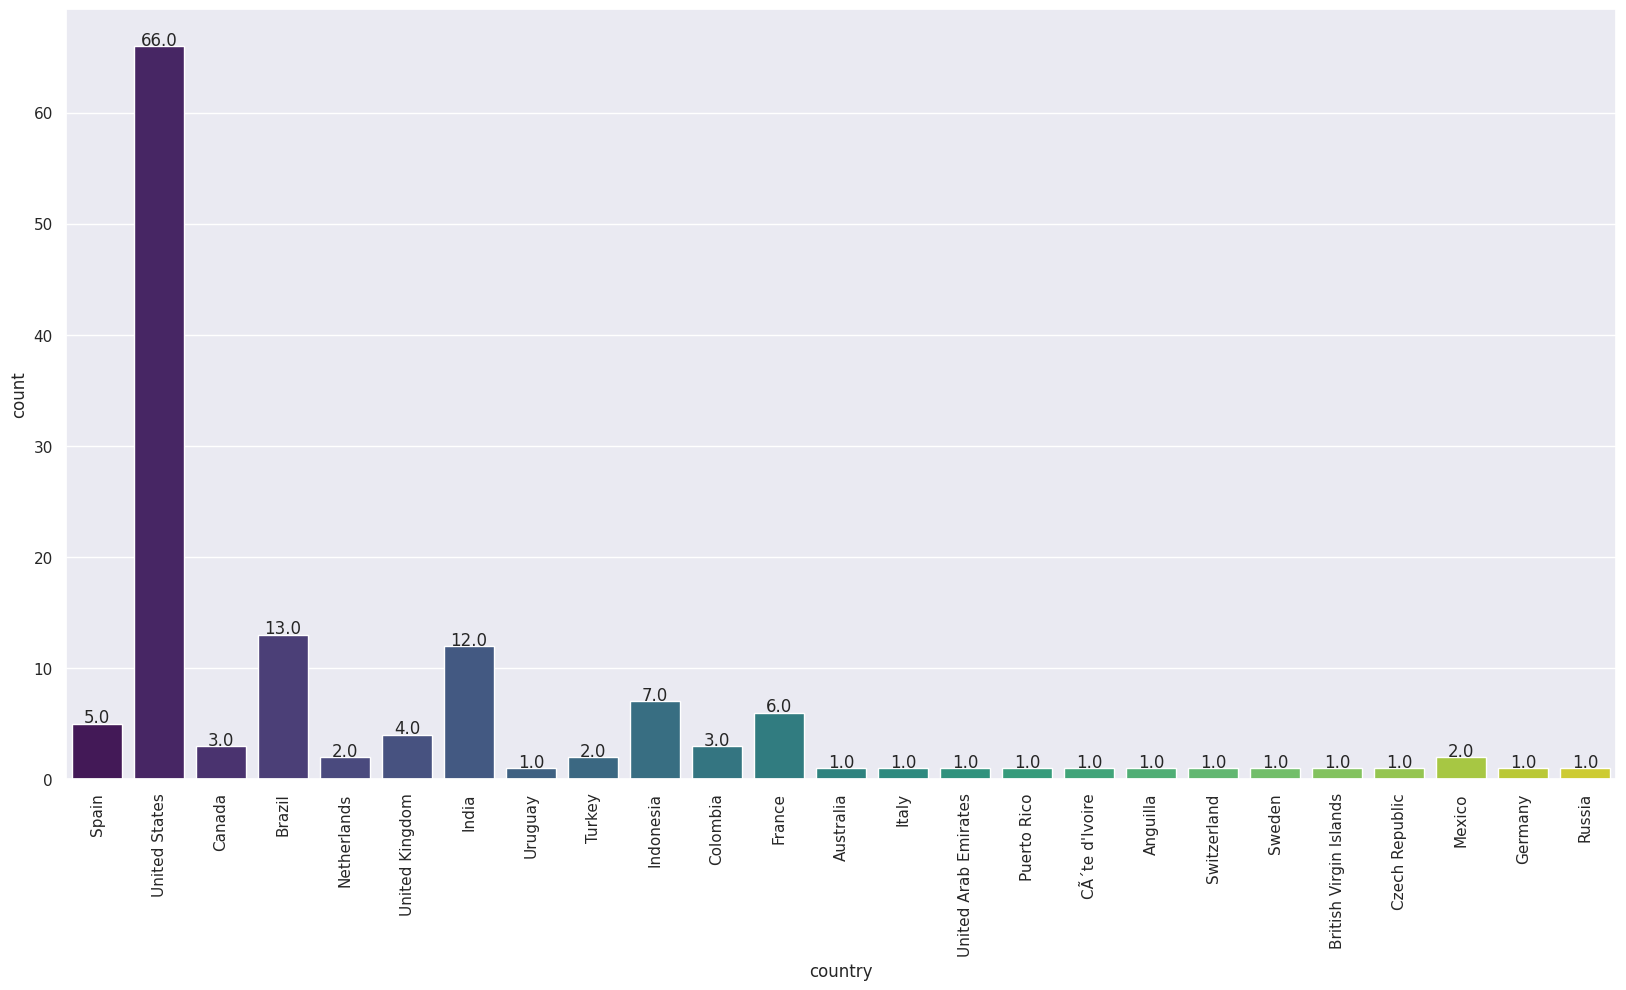

In [145]:
fig, ax1 = plt.subplots(figsize=(20, 10))

# Creating the countplot with the viridis palette
graph = sns.countplot(ax=ax1, x='country', data=df, palette='viridis')

# Rotating x-axis labels for better readability
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)

# Adding value labels on top of each bar
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha="center")

# Display the plot
plt.show()

<ipython-input-146-fd6521e29b39>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='influence_score', data=df, palette='pastel')


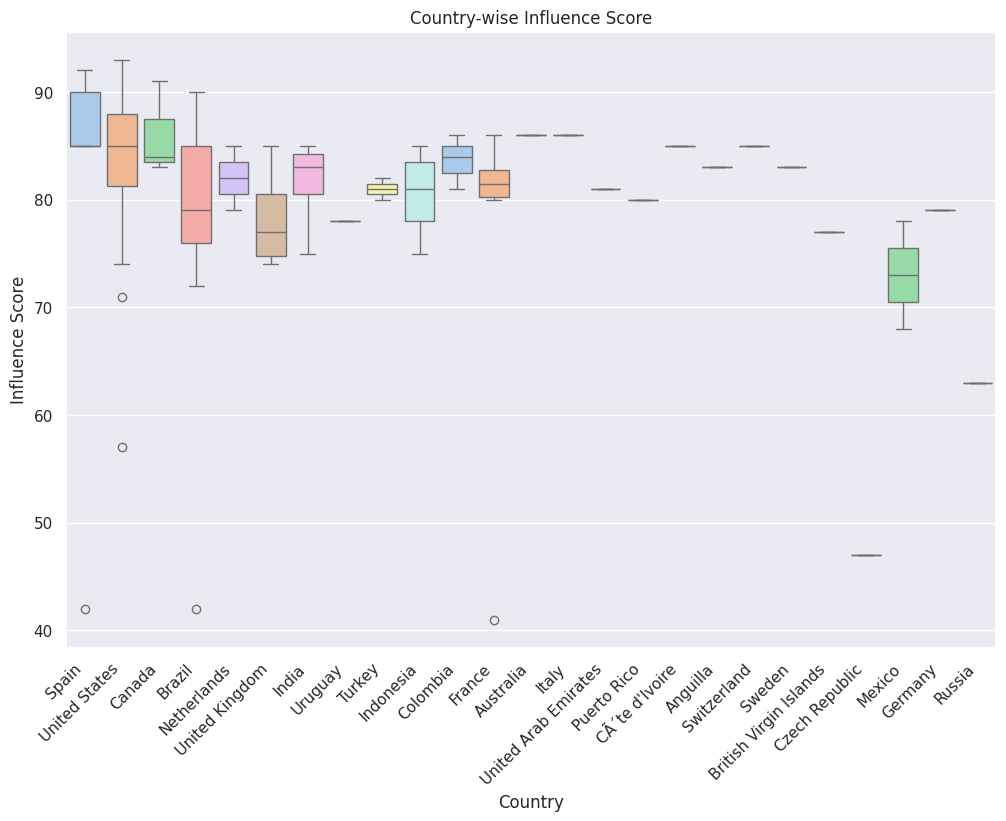

In [146]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='influence_score', data=df, palette='pastel')
plt.title('Country-wise Influence Score')
plt.xlabel('Country')
plt.ylabel('Influence Score')
plt.xticks(rotation=45, ha='right')
plt.show()

In [147]:
num_features=['influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']

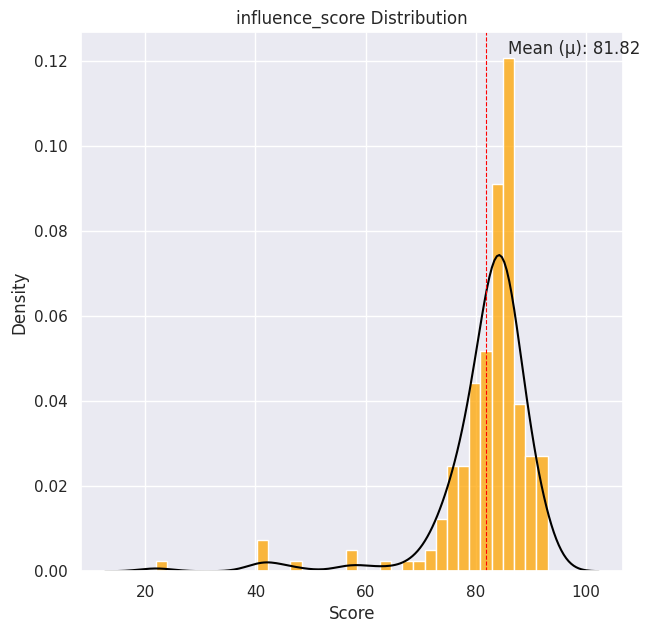

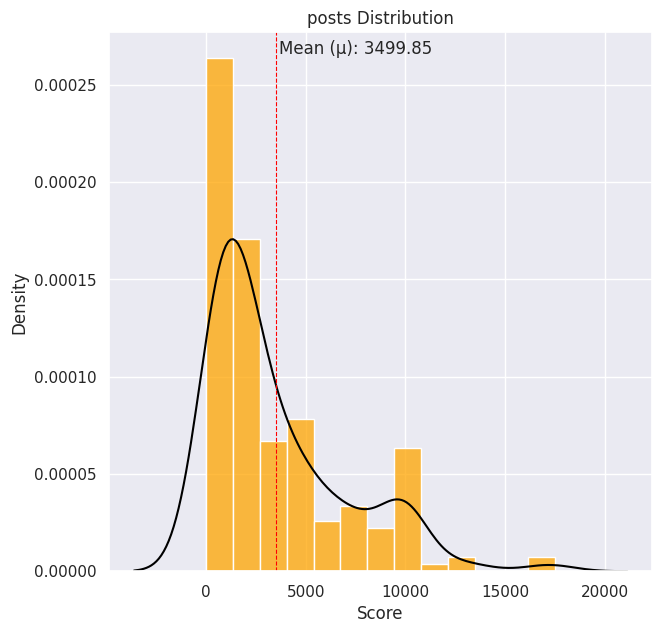

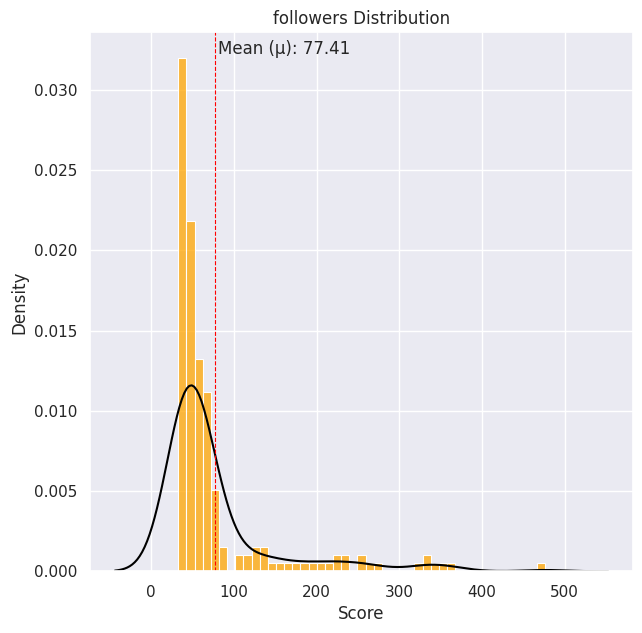

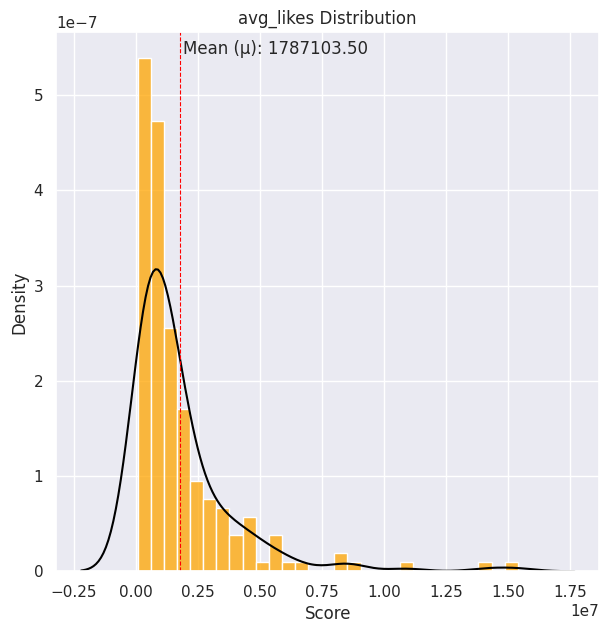

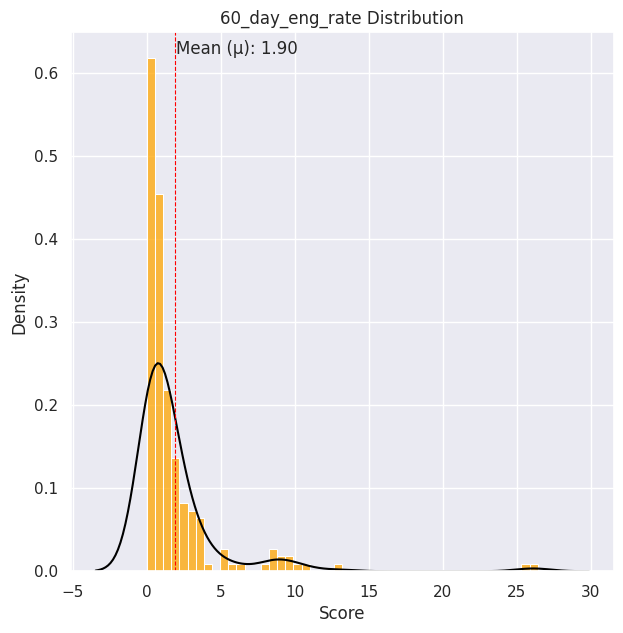

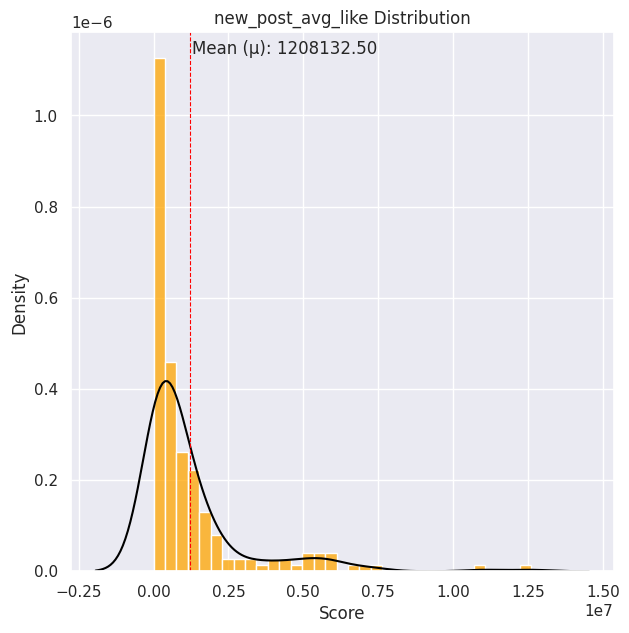

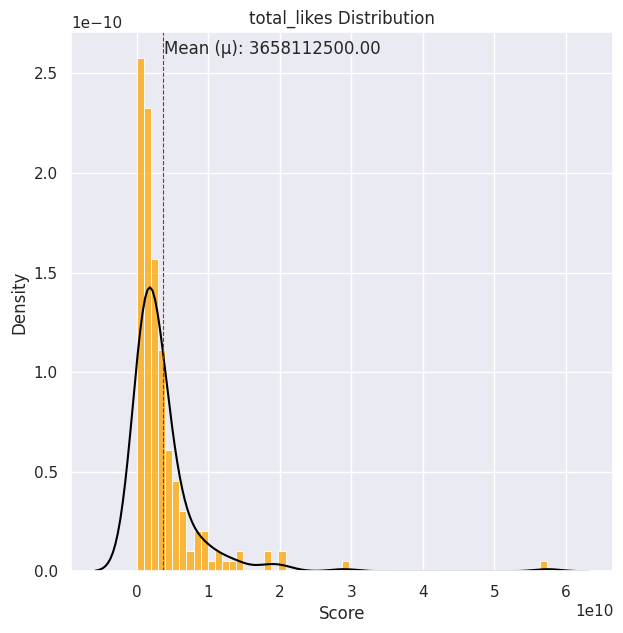

In [161]:
for column_name in num_features:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(df[column_name], stat='density',color='orange')
  sns.kdeplot(df[column_name], color='black')
  plt.axvline(df[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(df[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

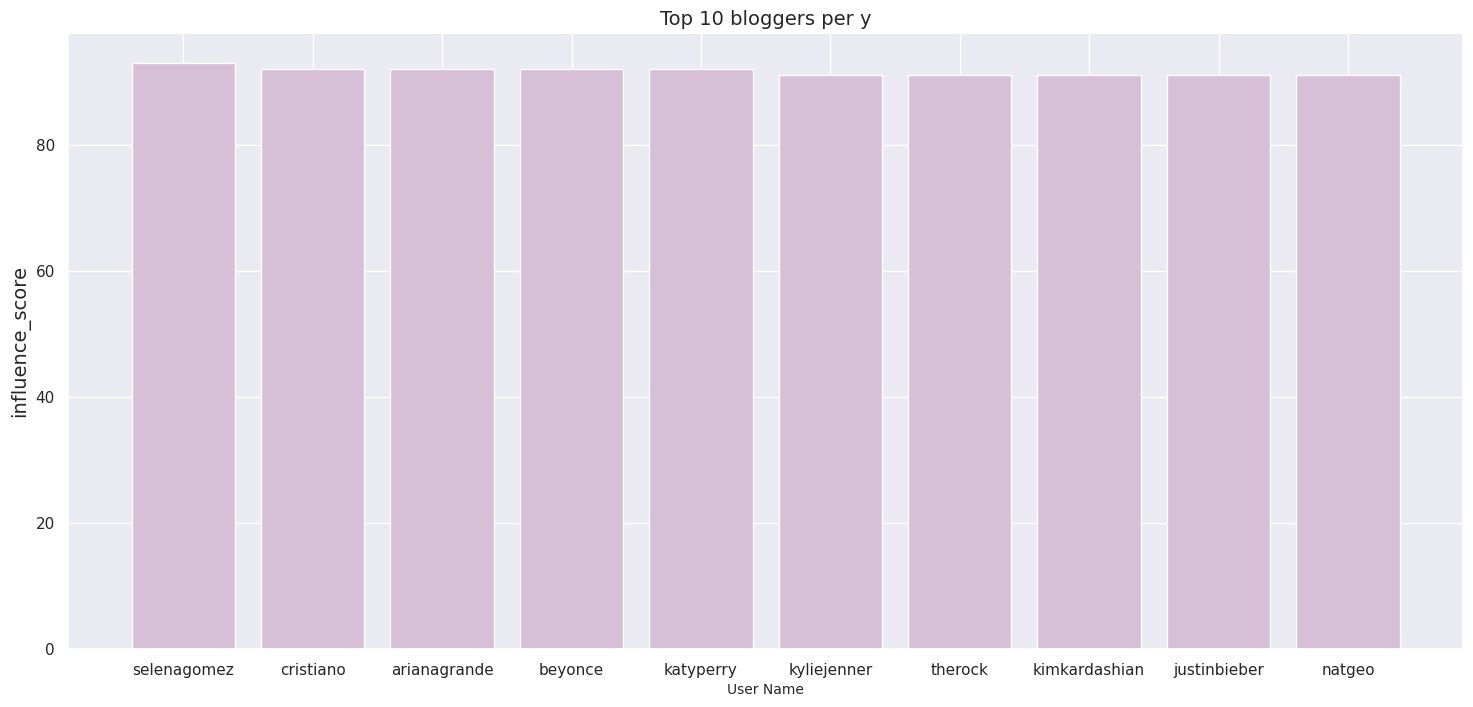

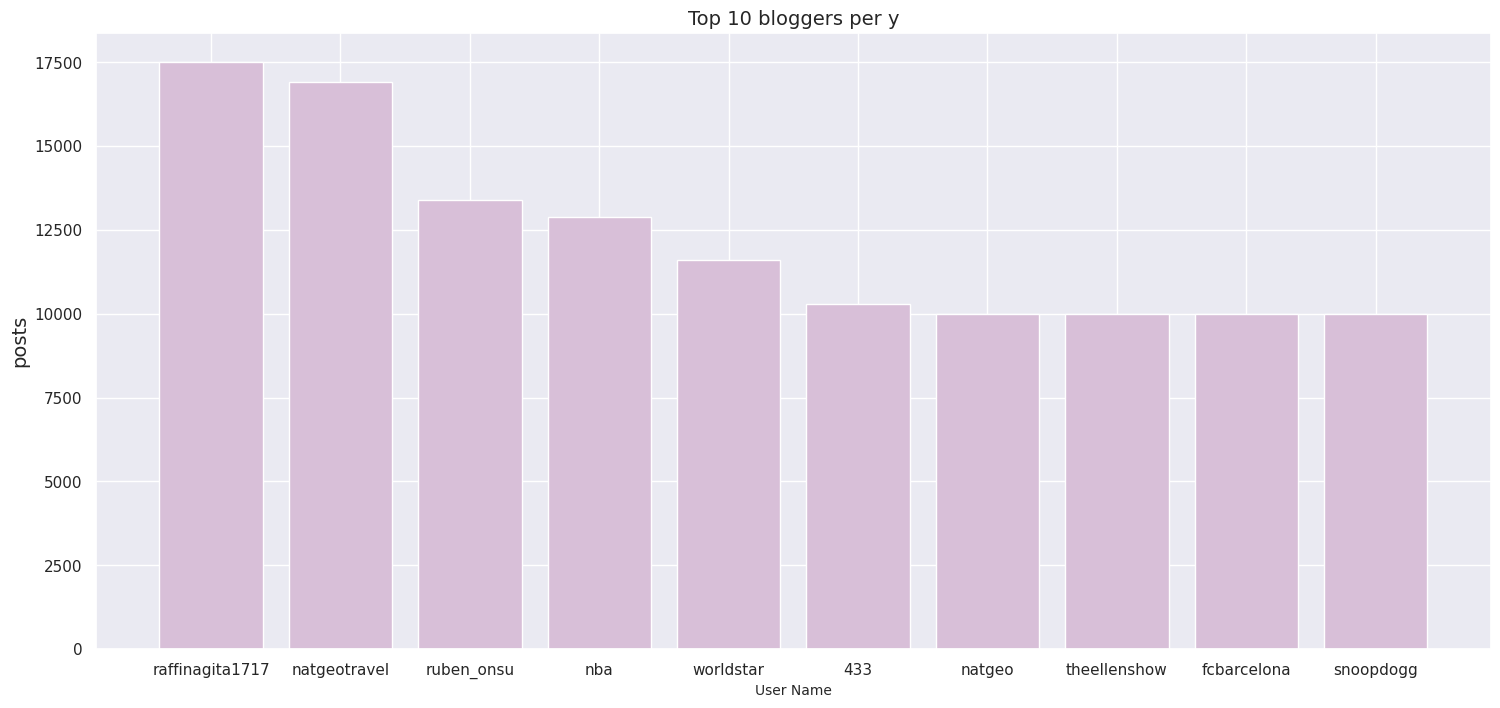

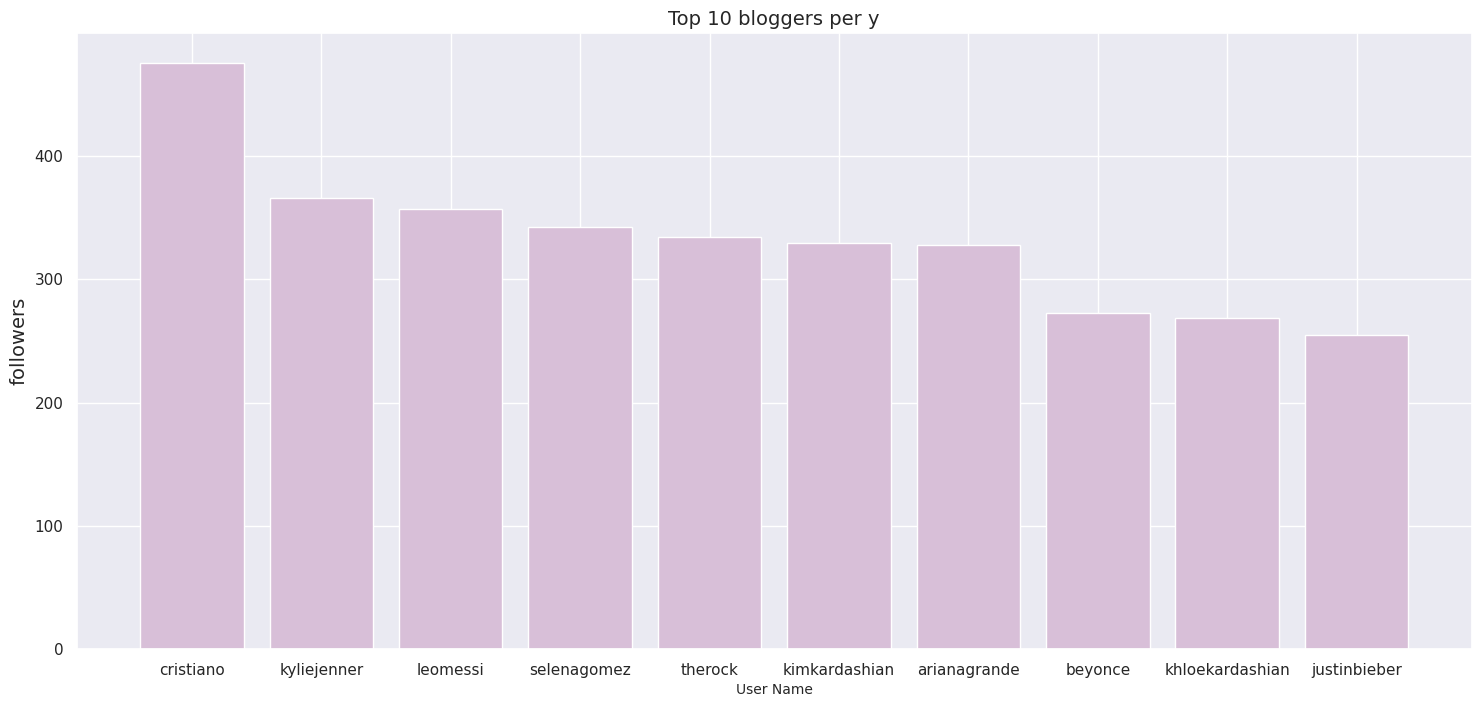

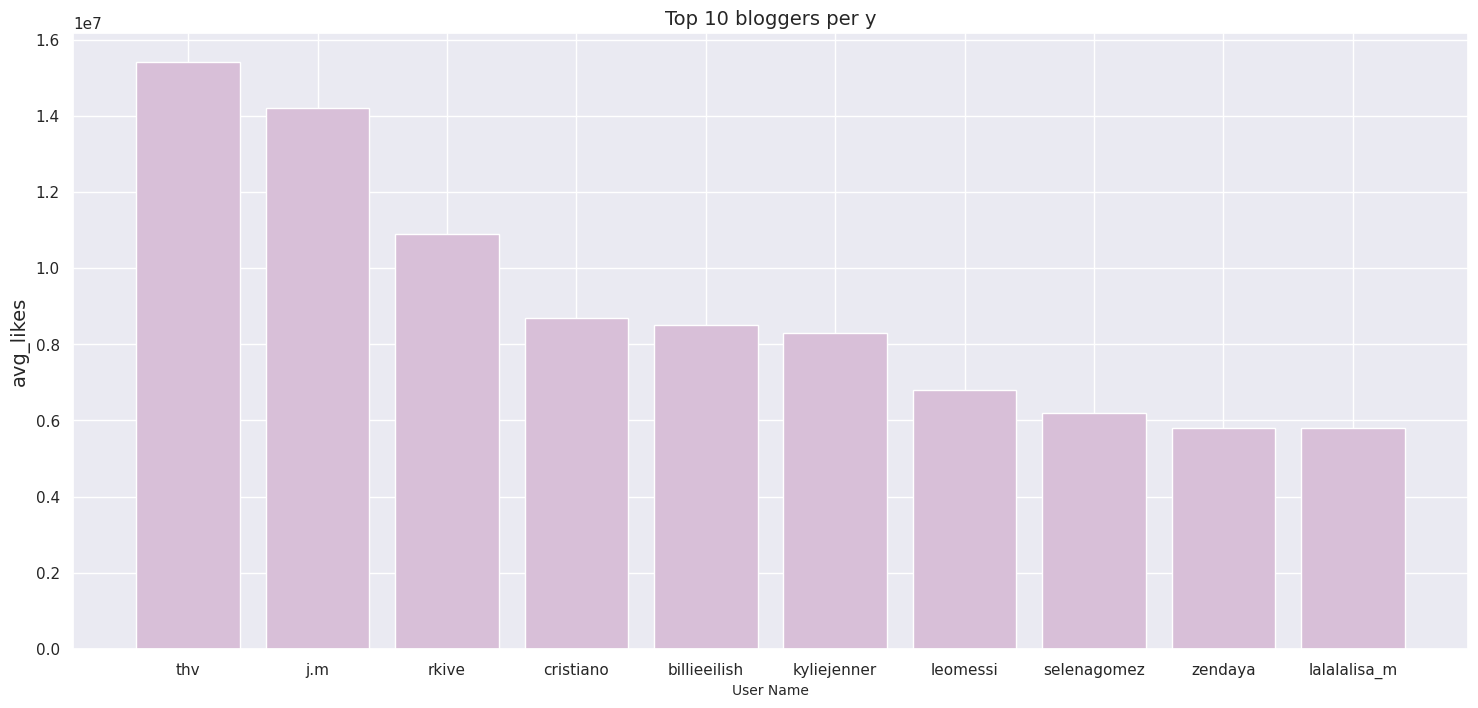

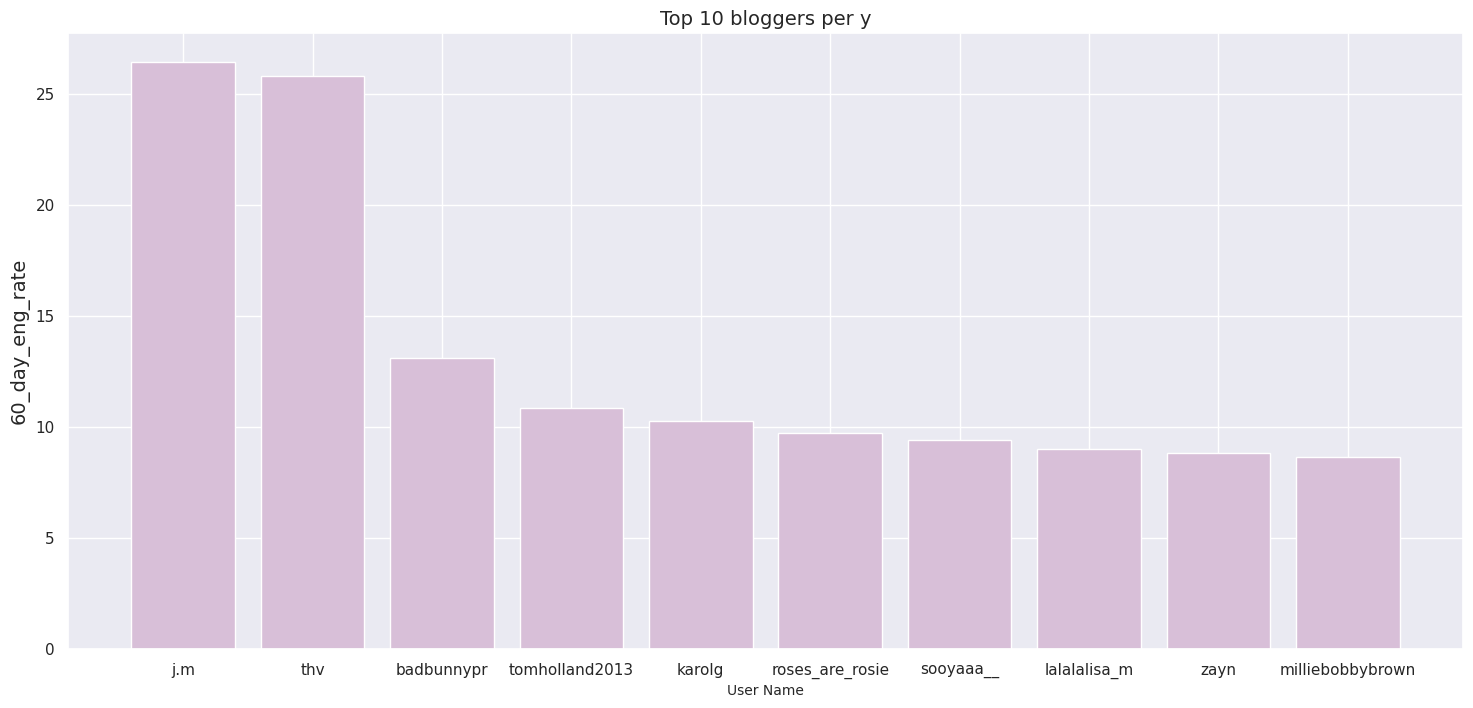

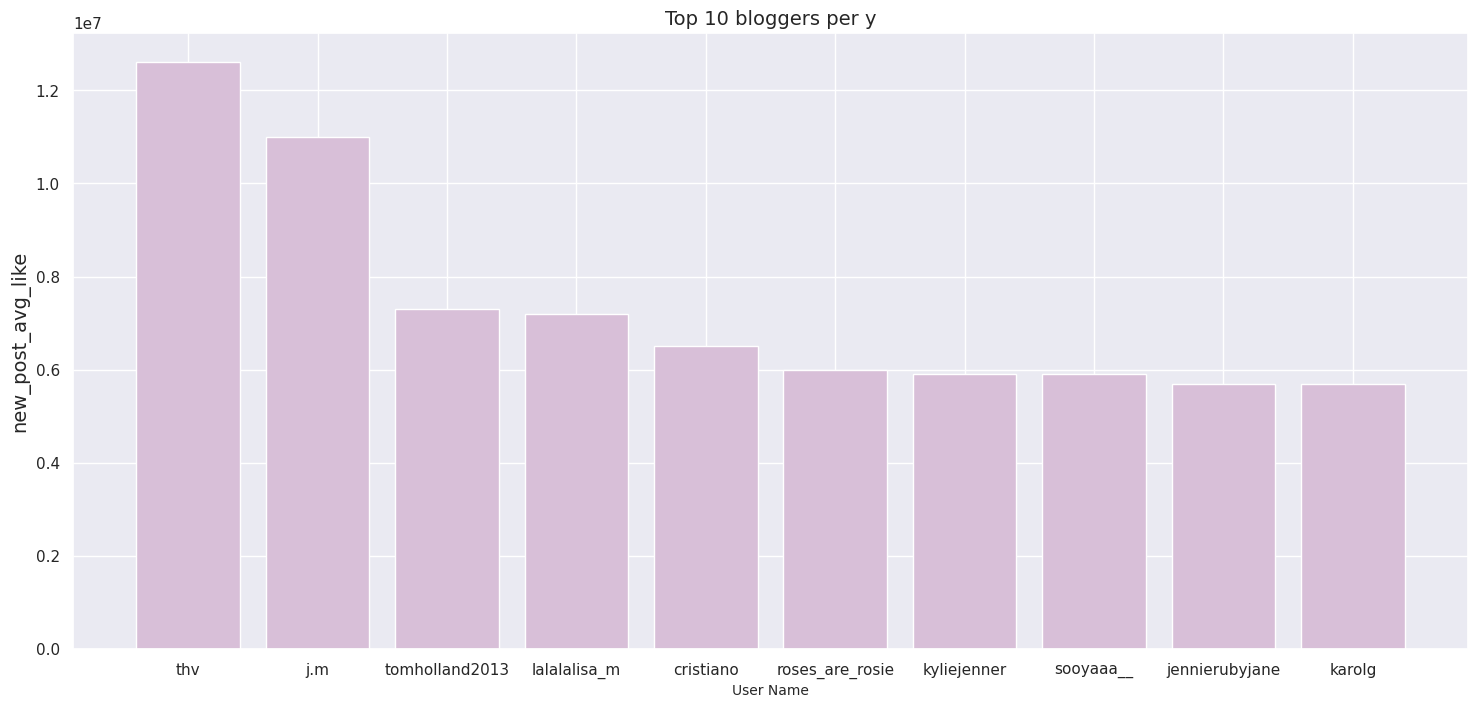

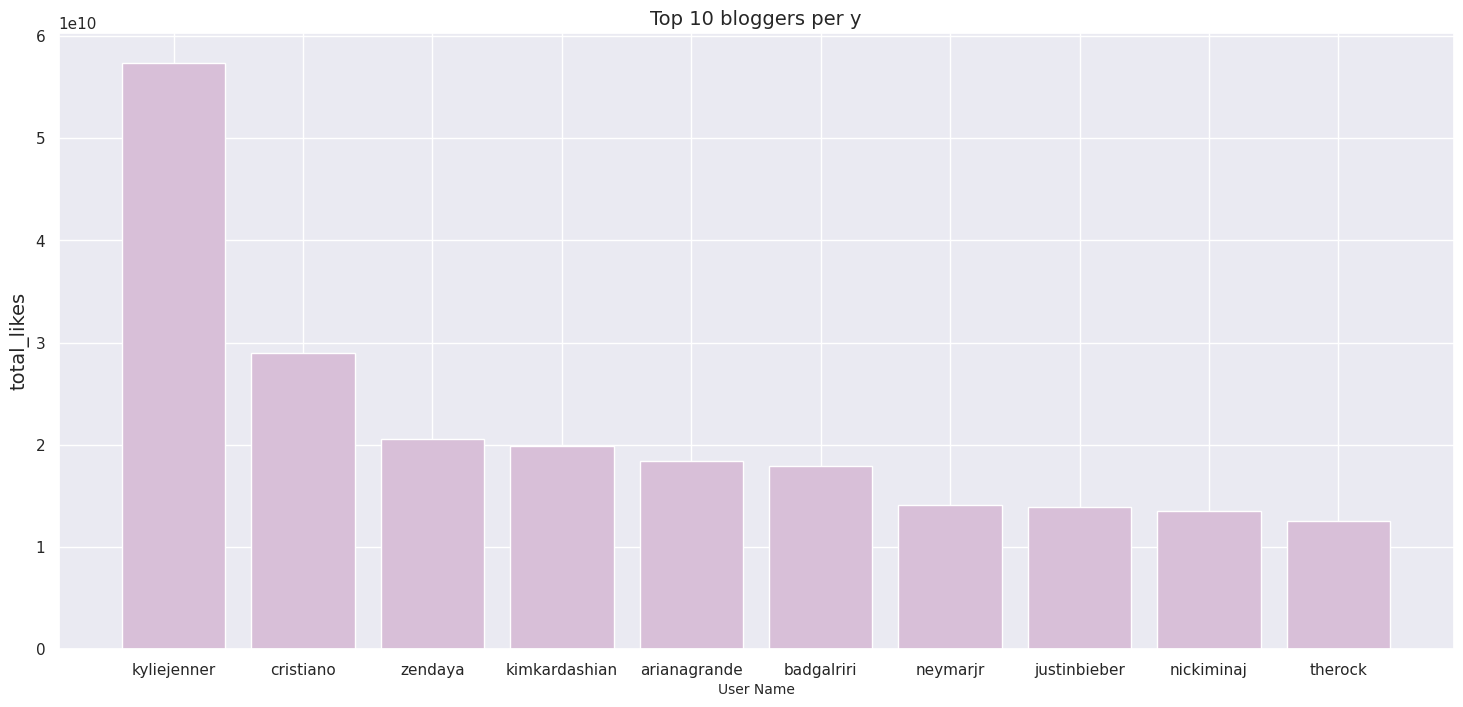

In [149]:
for column in num_features:
  top10 = df.nlargest(10,column)
  plt.figure(figsize=(18,8))
  plt.bar(top10['account_name'], top10[column],color='#D8BFD8')
  plt.ylabel(column, fontsize = 14)
  plt.xlabel("User Name", fontsize = 10)
  plt.title("Top 10 bloggers per y", fontsize = 14)

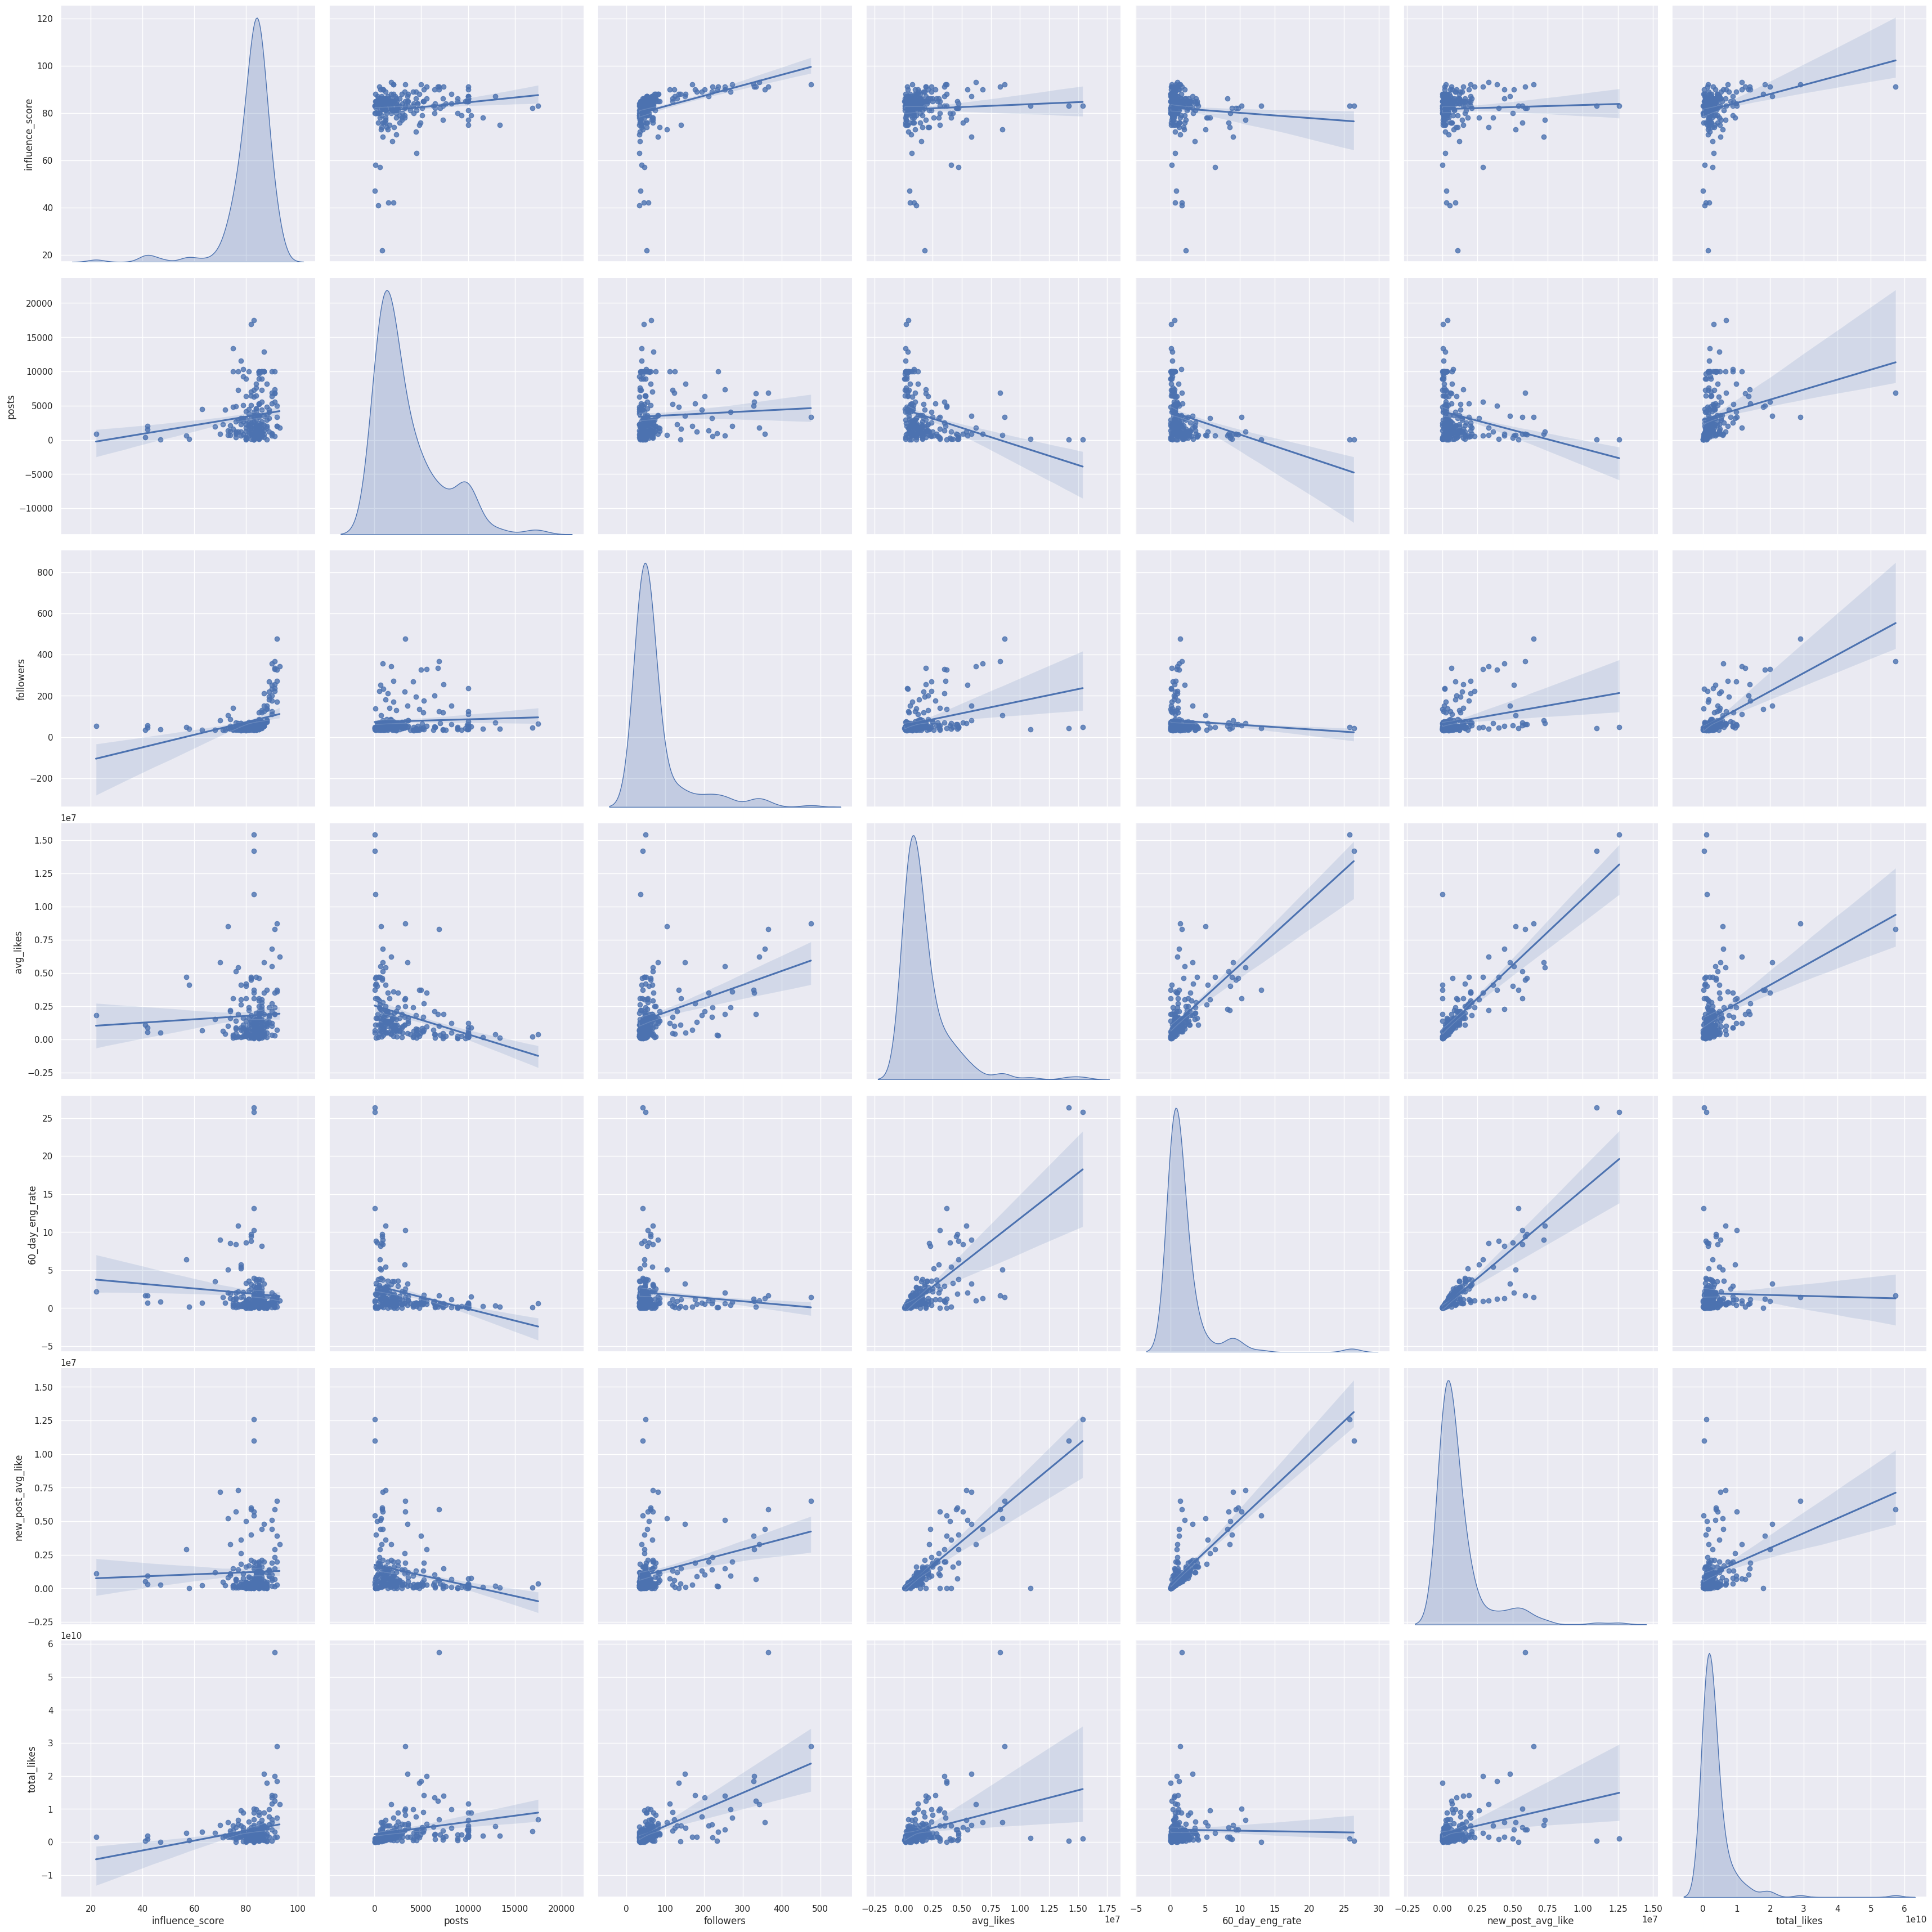

In [150]:
sns.set()
sns.pairplot(df,height = 5 ,kind ='reg',diag_kind='kde')
plt.show()

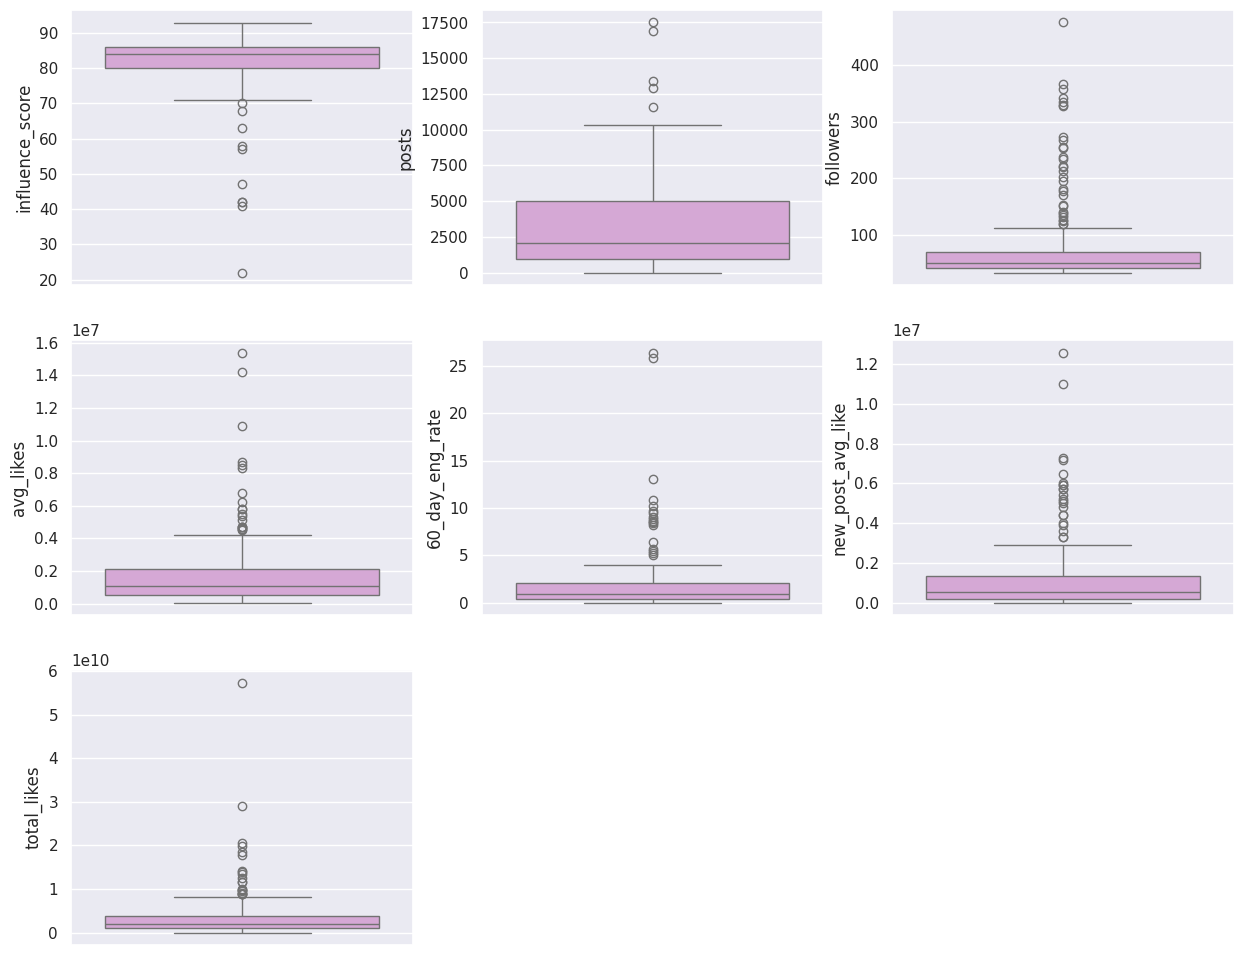

In [151]:
i=1
plt.figure(figsize=(15,25))
for feature in num_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature],color='#DDA0DD')
    i+=1

In [152]:
Country=list(df['country'])
Country1=list()
for val in Country:
  if Country.count(val)>10:
    Country1.append(1)
  elif 10>=Country.count(val)>1:
    Country1.append(2)
  else:
    Country1.append(3)

In [153]:
df['Country_rank']=Country1

In [154]:
df.drop('country',axis=1,inplace=True)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   account_name       200 non-null    object 
 1   influence_score    200 non-null    int64  
 2   posts              200 non-null    float64
 3   followers          200 non-null    float64
 4   avg_likes          200 non-null    float64
 5   60_day_eng_rate    199 non-null    float64
 6   new_post_avg_like  200 non-null    float64
 7   total_likes        200 non-null    float64
 8   Country_rank       200 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 15.6+ KB


In [156]:
df['60_day_eng_rate'].fillna(df['60_day_eng_rate'].median(), inplace=True)

<ipython-input-156-691dc3aa2141>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['60_day_eng_rate'].fillna(df['60_day_eng_rate'].median(), inplace=True)


# **Cluster Analysis**

In [157]:
df.drop('account_name',axis=1,inplace=True)

In [158]:
# Check for missing values in each column
print(df.isnull().sum())

influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
Country_rank         0
dtype: int64


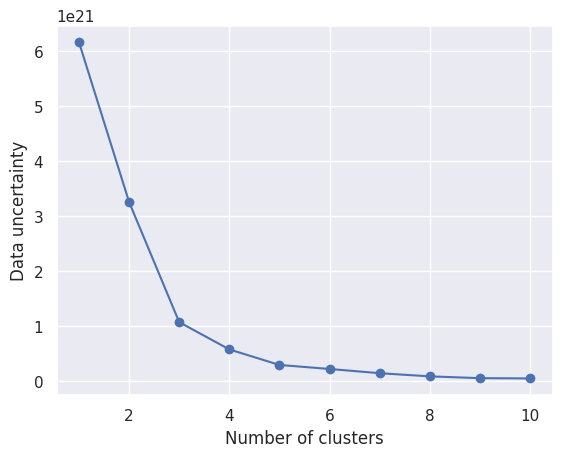

In [159]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)
fig, ax = plt.subplots()

ax.plot(range(1,11),wcss,'-o')

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Data uncertainty')

plt.show()

# **Statistical Analysis**

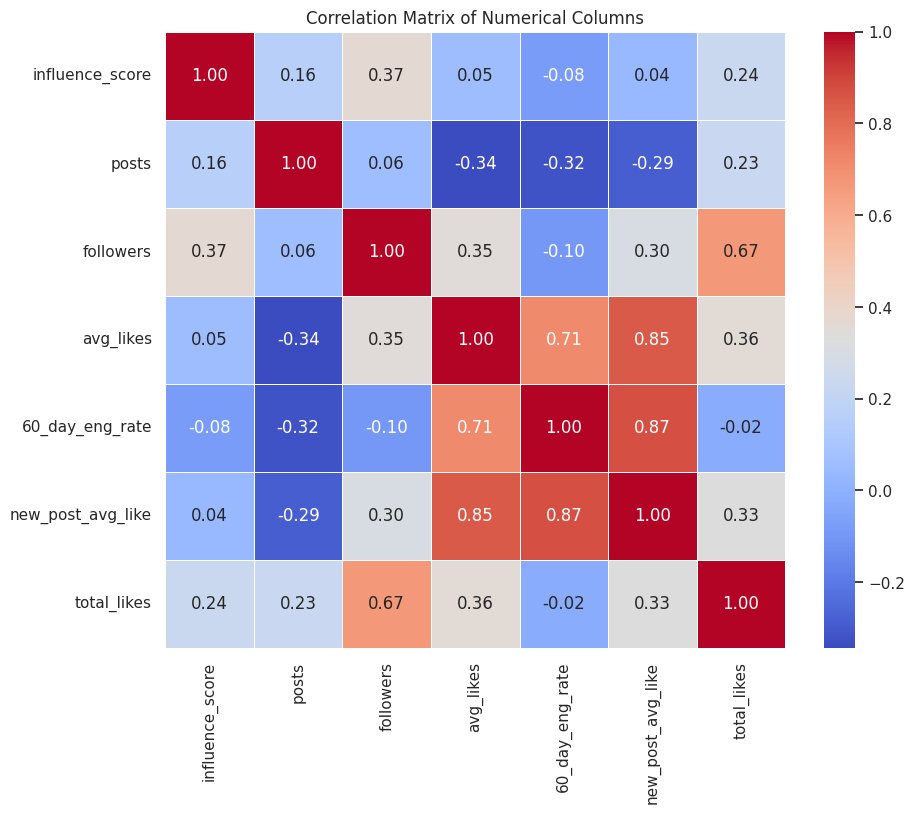

In [160]:
corr_data = df[num_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()